# TASK 1: Prediction using Supervised ML

# Author : Devraj Purna Visesh

 **Problem Statement**
 
 **What will be predicted score if a student studies for 9.25hrs/day?**
 
 Importing necessary libraries

In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
students_scores = pd.read_csv(url)
print("the Data is imported successfully") 

the Data is imported successfully


In [3]:
students_scores

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Understanding the Data**

In [4]:
students_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
students_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
students_scores.size

50

In [7]:
students_scores.shape

(25, 2)

In [8]:
students_scores.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
students_scores.shape

(25, 2)

In [10]:
students_scores.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

**Plotting the Data**

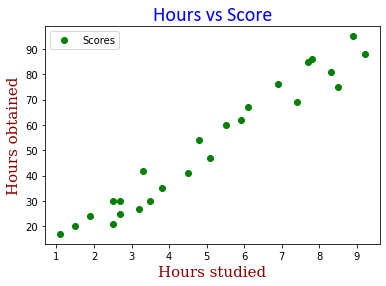

In [11]:

font1 = {'family':'Calibri','color':"blue",'size':20}
font2 = {'family':'serif','color':"darkred",'size':15}
students_scores.plot(x='Hours',y='Scores',style='o',c='green')
plt.title('Hours vs Score',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Hours obtained',fontdict=font2)
plt.show()


In [12]:
students_scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**From the above plot, it is concluded that there is a linear relationship between the Hours and Scores**

**Cleaning the Data**


In [14]:
students_scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Training and Testing the model**


In [15]:
x=(students_scores['Hours'].values).reshape(-1,1)
y=students_scores['Scores'].values


In [16]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('Splitting is done')


Splitting is done


In [19]:
from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(x_train,y_train)
print('Trainning is done')

Trainning is done


In [20]:
print('Intercept value is:',regn.intercept_)
print('Linear coefficient is:',regn.coef_)


Intercept value is: 2.018160041434683
Linear coefficient is: [9.91065648]


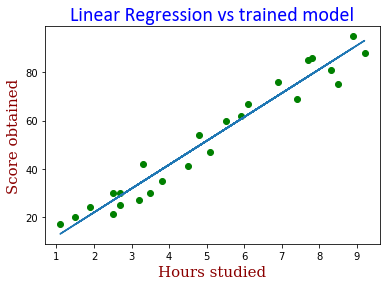

In [21]:
# Plottibng the regression line
line = regn.coef_*x+regn.intercept_

# Plotting for the test data
plt.scatter(x, y,c='green')
plt.title('Linear Regression vs trained model',fontdict=font1)
plt.xlabel('Hours studied',fontdict=font2)
plt.ylabel('Score obtained',fontdict=font2)
plt.plot(x, line);
plt.show()


**Predicting Values**

In [23]:
#To predict scores of testing data
y_pred = regn.predict(x_test)

In [24]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [25]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [26]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


<function matplotlib.pyplot.show(close=None, block=None)>

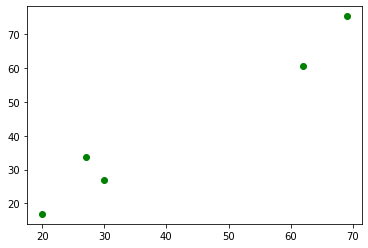

In [27]:
plt.scatter(y_test, y_pred, c="green")
plt.show

 **Solution to the given Problem Statement**

 What will be the predicted score if a student studies for 9.25hrs/day?

In [28]:
hours=9.25
pred_score=regn.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))


Number of Hours = 9.25
Predicted Score = 93.69173248737538


**Evaluating the Model**

In [29]:
from sklearn import metrics
print('Mean Absolute Error:',
     metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.183859899002975


# Conclusion

**For a student studying 9.25Hrs a day, the model predicts his score as 93.69173**